# VAE Evaluation Notebook
This notebook loads a trained BetaVAE and evaluates reconstructions, KL, and latent traversals.


In [1]:
from src.vae.evaluate_run import load_vae, val_loader_from_yaml, basic_metrics, mu_variance, plot_recon, latent_traverse, pca_traverse

# Set paths
run_dir = 'runs/celebA_vae/beta_vae_celebA_20250616_034952'

/home/tonso/code/00--research/latent-reason/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Prepare validation loader

vae, train_cfg, device = load_vae(run_dir)

# pick the 'val' split from the same data.yaml you used to train
in_ch     = vae.config.encoder.in_channels
img_size  = vae.config.img_size
data_yaml = train_cfg['data_yaml']
bs        = train_cfg['batch_size']

val_loader = val_loader_from_yaml(
    data_yaml = data_yaml,
    img_size  = img_size,
    in_ch     = in_ch,
    bs        = bs
)


In [3]:
# Basic MSE and KL metrics
basic_metrics(vae, val_loader, device)


MSE(x, recon_mu):   0.027973
MSE(x, recon_zero): 0.116730
True KL  (mean):    26.406525
Budgeted KL (mean): 26.406525



In [4]:
# μ‐variance across validation set
mus = mu_variance(vae, val_loader, device)


μ-variance (mean over dims): 0.427828
Top-10 dims by variance:      [1.1844974756240845, 1.1016579866409302, 0.8574891090393066, 0.8274617195129395, 0.7996396422386169, 0.7207121253013611, 0.719398558139801, 0.7147448658943176, 0.6855742931365967, 0.5054547786712646]


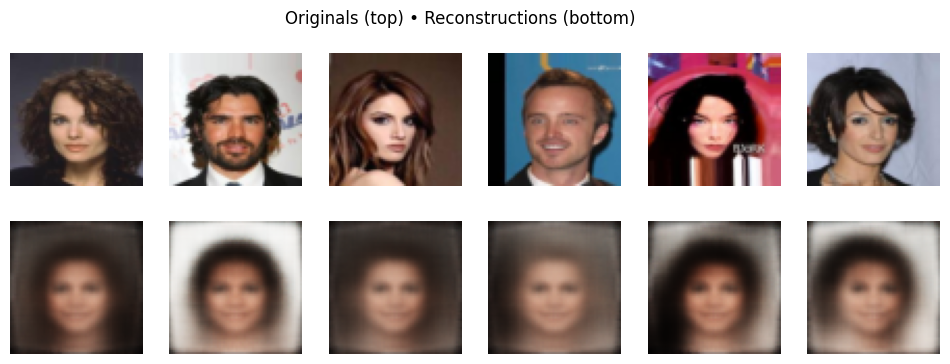

In [5]:
# Plot reconstructions
plot_recon(vae, val_loader, device, n=6)


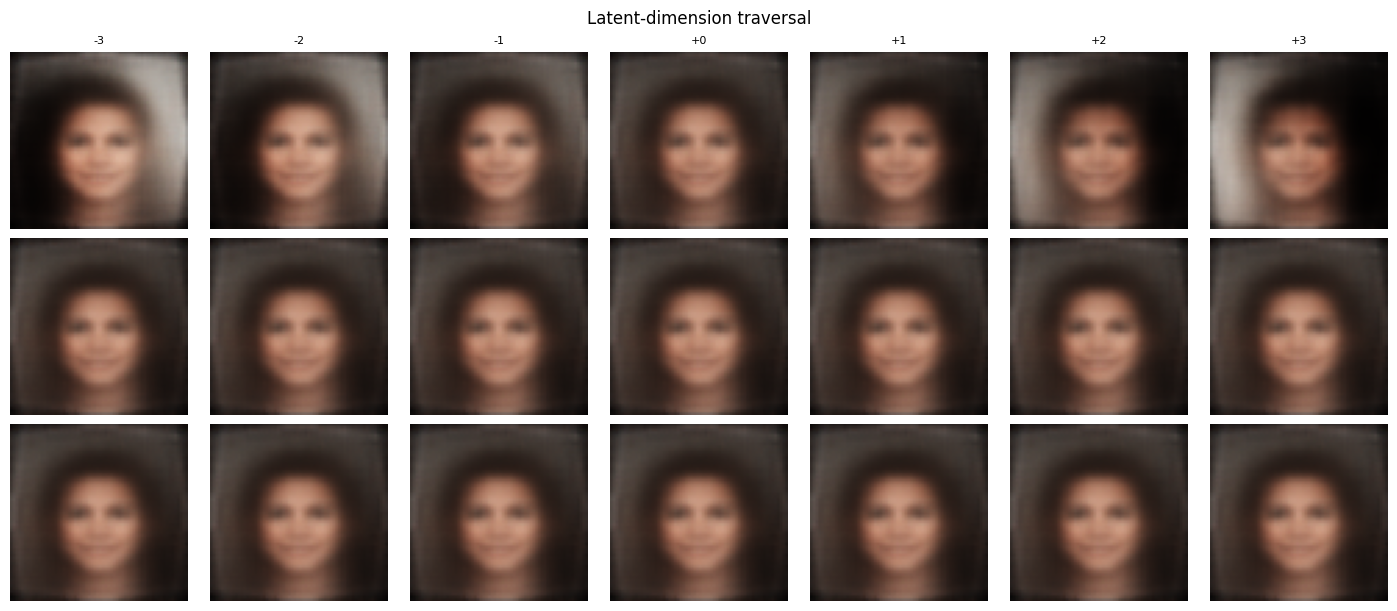

In [6]:
# Latent dimension traversal
latent_traverse(vae, val_loader, device, dims=3)


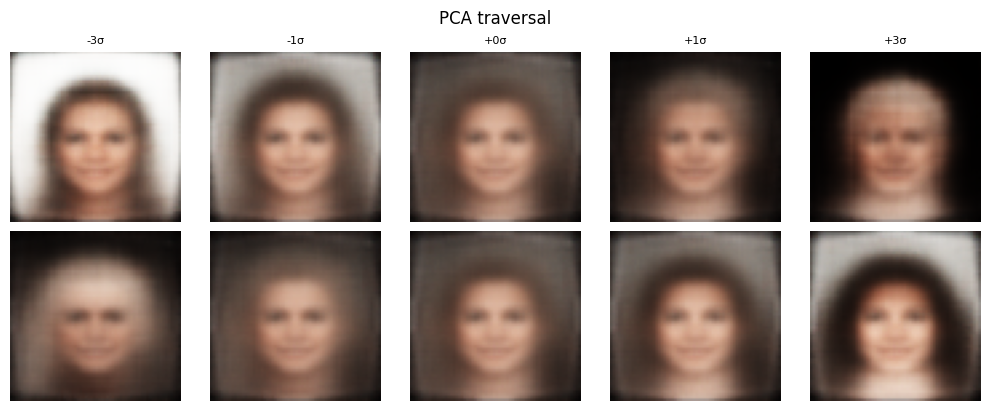

In [7]:
# PCA-based traversal
pca_traverse(vae, val_loader, device, n_pcs=2)
